# Nanodegree Engenheiro de Machine Learning

## Projeto Final
## Exploração dos Dados

Este notebook demonstra as partes mais relevantes da exploração dos dados e é uma forma de se familiarizar com o problema abordado.

Para que todas as células executem com sucesso é necessário configurar os arquivos de dados conforme indicado no README do projeto.

As funções get_features 

In [62]:
from speechsplit import get_features
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
from utils import play, load_audio
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import xticks, yticks

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('seaborn-colorblind')

def describe_discarding_inf(array):
    return pd.DataFrame(array[array > -float('inf')]).describe()

### Algumas amostras de áudio

Uma amostra de fala do palestrante, da tradutora e de uma pausa em silêncio.

In [63]:
speaker_sample = load_audio('data/speaker_sample.wav')
translator_sample = load_audio('data/translator_sample.wav')
silence_sample = load_audio('data/silence_sample.wav')

mfcc_speaker, loudness_speaker = get_features(speaker_sample)
mfcc_silence, loudness_silence = get_features(speaker_sample)

In [64]:
speaker_sample, translator_sample, silence_sample

(Audio (length: 00:04.401, dB: -25.52),
 Audio (length: 00:04.291, dB: -17.36),
 Audio (length: 00:06.165, dB: -54.05))

É possível ouvir o áudio pelo player exibido na interface do notebook <a id='audio_samples'></a>

In [65]:
speaker_sample

Audio (length: 00:04.401, dB: -25.52)

In [66]:
translator_sample

Audio (length: 00:04.291, dB: -17.36)

In [67]:
silence_sample

Audio (length: 00:06.165, dB: -54.05)

#### Algumas estatísicas sobre os áudios

In [68]:
describe_discarding_inf(loudness_speaker)

,0
count,440.000000
mean,-38.655865
std,16.375428
min,-90.308999
25%,-51.419345
50%,-35.276486
75%,-24.600209
max,-16.745918


In [69]:
describe_discarding_inf(loudness_silence)

,0
count,440.000000
mean,-38.655865
std,16.375428
min,-90.308999
25%,-51.419345
50%,-35.276486
75%,-24.600209
max,-16.745918


#### Um histograma do volume de áudio

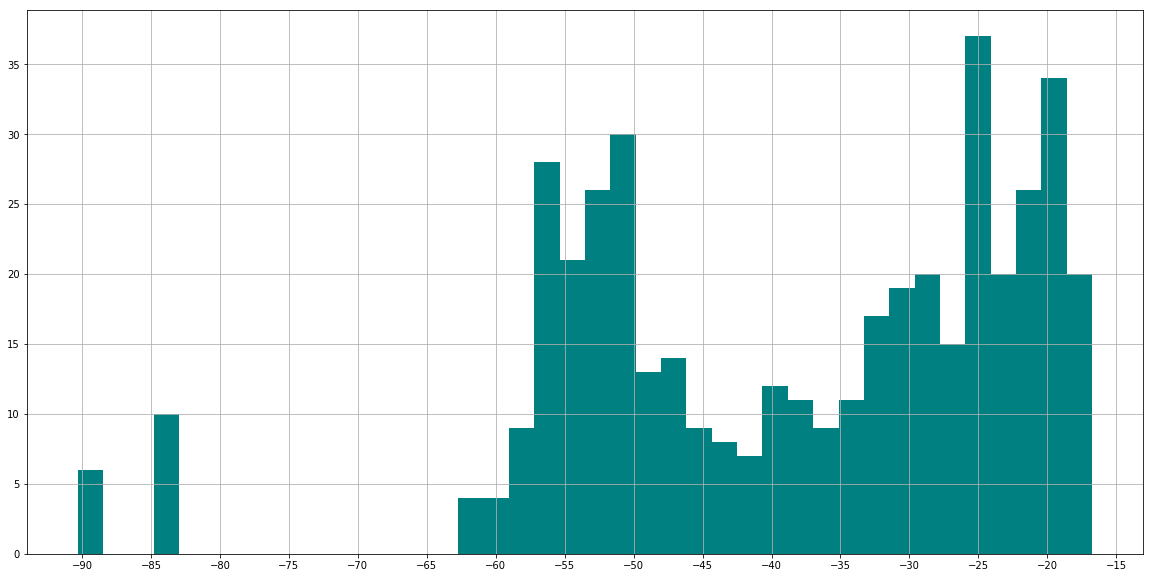

In [70]:
plt.grid(True)
xticks(np.arange(0, -100, -5))
plt.hist(loudness_speaker, bins=40, color='teal');

### Visualizando um trecho de áudio

#### Gráfico da onda sonora de um pequeno trecho

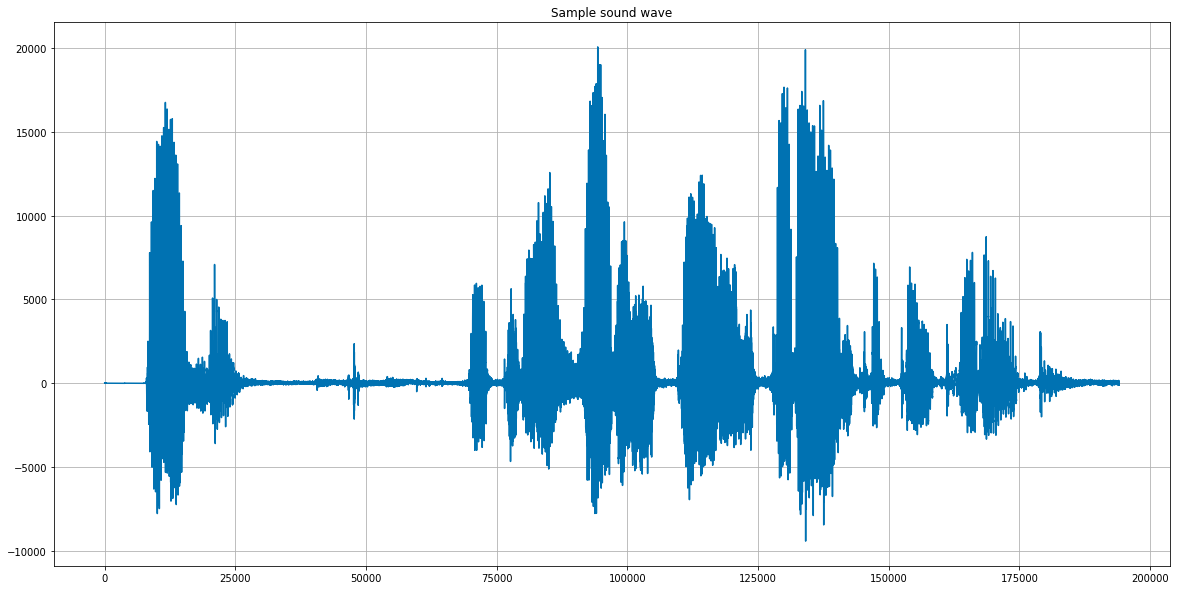

In [71]:
from speechsplit import get_numpy_array_of_samples

wav = get_numpy_array_of_samples(speaker_sample)
plt.title('Sample sound wave')
plt.grid(True)
plt.plot(wav)

A seguir um gráfico mais detalhado, incluindo função de **máximo volume** em janela (em vermelho) e marcação de **pontos audíveis**, com volume acima de -42 dBFS (em azul)


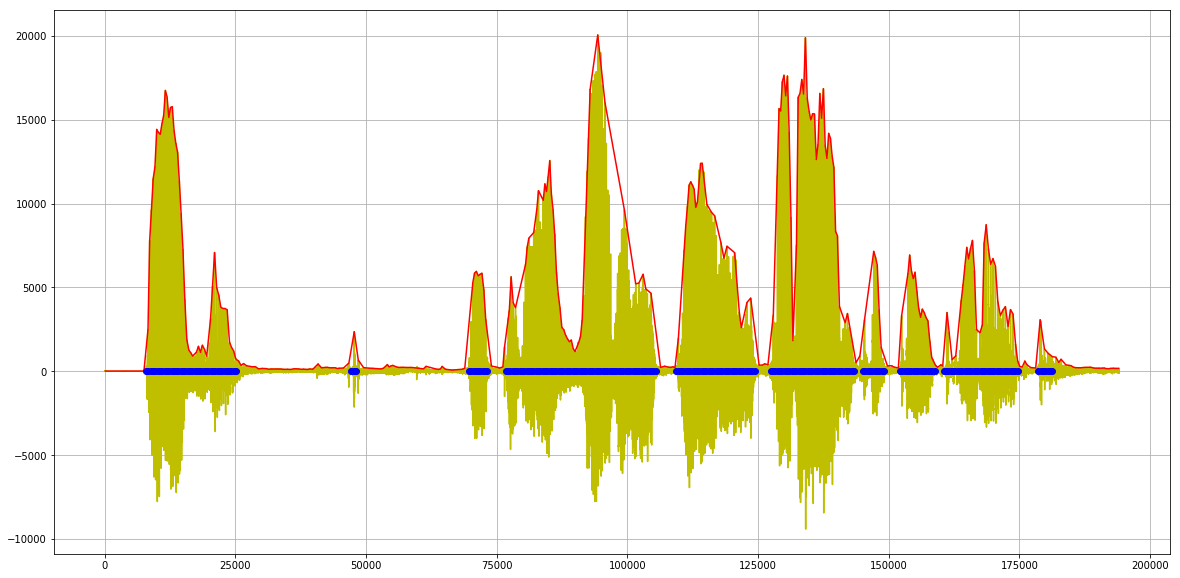

In [72]:
from scipy.signal import argrelextrema

def plot_wave_with_upper_bound_and_audible_points(audio, order=300):
    ss = get_numpy_array_of_samples(audio)
    xx = argrelextrema(ss, np.greater, order=order)[0]
    yy = ss[xx]
    plt.grid(True)
    plt.plot(ss, 'y')
    plt.plot(xx, yy, 'r')
    
    _, loudness = get_features(audio)
    factor = len(ss)/len(loudness)
    xl = (np.where(loudness > -42)[0] + 1) * factor
    plt.scatter(xl, np.repeat(0, len(xl)), zorder=1000, color='blue')

plot_wave_with_upper_bound_and_audible_points(speaker_sample)

### Coeficientes mel-cepstrais (MFCC)

#### Estatísticas sobre os coeficientes mel-cepostrais da amostra

In [73]:
pd.DataFrame(mfcc_speaker).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,-4.710604,-20.959251,18.023024,-12.580996,9.411911,-6.335633,-7.056326,8.494147,-26.016057,11.817105,-8.413468,6.293306
std,17.458838,14.146938,13.628431,11.506733,12.551534,16.153078,12.675325,12.364325,12.580455,12.585597,12.142344,9.416077
min,-72.762819,-51.139065,-31.144827,-48.038973,-40.584969,-64.457769,-45.387920,-32.868932,-72.939420,-36.931212,-45.938755,-25.951882
25%,-17.638717,-29.625167,11.377690,-19.578444,0.830945,-16.120181,-15.740006,1.470427,-33.416513,4.168174,-16.470593,-0.124278
50%,-6.167499,-23.162579,18.403728,-13.672988,10.317078,-4.541183,-7.709482,9.870887,-25.690786,13.672449,-9.276618,6.580143
75%,11.493184,-14.219175,26.336701,-5.552959,17.781365,5.751504,2.119618,16.840961,-18.159535,20.664071,-0.929001,13.078830
max,26.202854,30.220039,54.832163,30.855534,56.361997,29.551707,33.733341,37.743538,12.759515,37.662539,30.398477,32.551578


#### Mapa de calor dos coeficientes mel-cepstrais da amotra

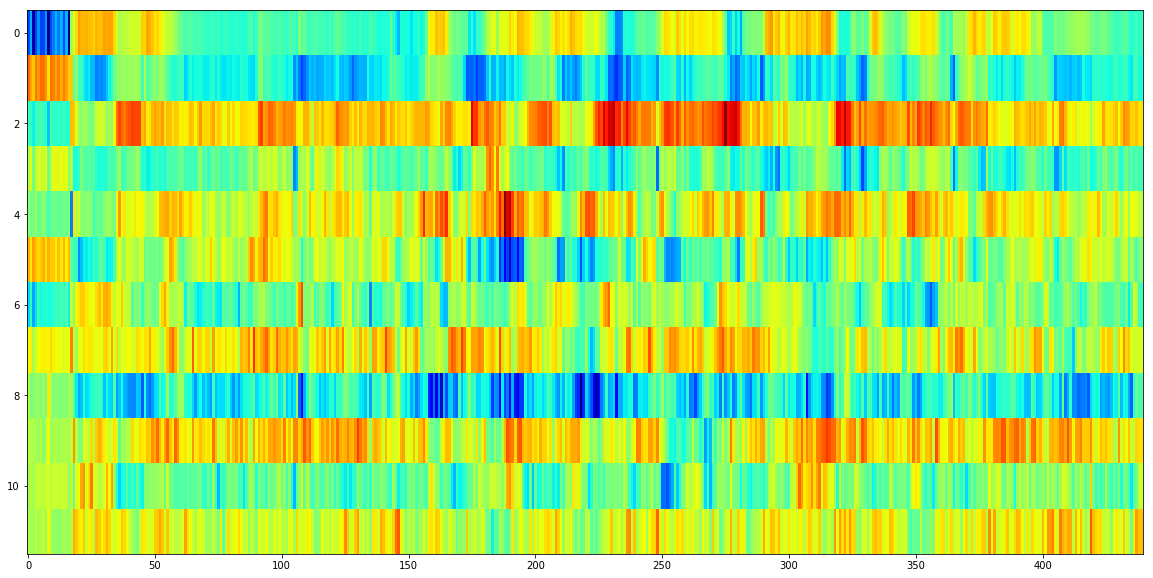

In [74]:
plt.imshow(np.transpose(mfcc_speaker), cmap=plt.cm.jet, aspect='auto')

### Fragmentação de audio

Este é um exemplo trivial de fragmentação, em que um áudio muito pequeno (4400 ms) é fragmentado em 2 partes. 


In [75]:
from fragmentation import get_chunks

def chunks_to_dataframe(chunks):
    df = pd.DataFrame(chunks)
    return df[['silence_start', 'start', 'end', 'level', 'truth', 'label']]

speaker_chunks = get_chunks(speaker_sample, load_if_available=False)
chunks_to_dataframe(speaker_chunks)

,silence_start,start,end,level,truth,label
0,0,0,530,0,None,None
1,530,1590,3950,1,None,None


Ouça e compare os dois trechos gerados com o trecho original do palestrante, no [início deste notebook](#audio_samples).

In [76]:
speaker_chunks[0].cut(speaker_sample)

Audio (length: 00:00.530, dB: -24.97)

In [77]:
speaker_chunks[1].cut(speaker_sample)

Audio (length: 00:02.360, dB: -23.48)

In [78]:
from speechsplit import VOICES

fnames = ['data/2014_01_20_F.wav',
          'data/2014_01_21_F.wav',
          'data/2014_01_22_F.wav',
          'data/2014_01_23_F.wav',]
audios = [load_audio(f) for f in fnames]

Um exemplo maior, com 1 minuto do primeiro áudio:

In [79]:
audio_1min = audios[0][:60000]
%time chunks_1min = get_chunks(audio_1min, load_if_available=False)
chunks_to_dataframe(chunks_1min)

CPU times: user 14.8 s, sys: 152 ms, total: 15 s
Wall time: 14.7 s


,silence_start,start,end,level,truth,label
0,0,1710,2050,0,None,None
1,2050,3110,5450,0,None,None
2,5450,6330,7020,3,None,None
3,7020,7230,10040,3,None,None
4,10040,11210,12480,2,None,None
5,12480,12810,14730,2,None,None
6,14730,15600,19320,0,None,None
7,19320,20640,21010,0,None,None
8,21010,22020,23930,31,None,None
9,23930,24620,27510,3,None,None


#### Verificação de que a fragmentação tende a produzir trechos com apenas um falante.

Na atribuição de *ground truth* somente os trechos com apenas um falante receberam uma das classes a seguir. Aqueles onde havia duas vozes foram classificados com o valor *both*.

In [80]:
VOICES  # classes

['speaker', 'translator']

In [81]:
chunk_lists = [(a.filename, get_chunks(a)) for a in audios]

# As fragmentações desses arquivos devem ter ground truth atribuída,
# isto é, todos os fragmentos foram receberam alguma classificação manual
assert not any([c for c in chunks if not c.truth] for f, chunks in chunk_lists)

def proportion_chunks_both_voices(chunks):
    return len([c for c in chunks if c.truth not in VOICES]) / float(len(chunks))

both = [(f, proportion_chunks_both_voices(chunks)) for f, chunks in chunk_lists]
pd.DataFrame(both, columns=['arquivo', 'proporção de colisões de voz em fragmentos'])

,arquivo,proporção de colisões de voz em fragmentos
0,data/2014_01_20_F.wav,0.006798
1,data/2014_01_21_F.wav,0.011070
2,data/2014_01_22_F.wav,0.006723
3,data/2014_01_23_F.wav,0.007782


### Grid search para escolher a configuração do SVC

In [82]:
from speechsplit import get_some_chunks_with_set_truth, build_training_data
from grid_search import grid_search
from utils import flatten

chunks = get_chunks(original)

# Tomamos alguns fragmentos somando pelo menos 10 segundos para cada falante 
training_chunks = get_some_chunks_with_set_truth(chunks, 10000)
chunks_to_dataframe(sorted(flatten(training_chunks.values())))

,silence_start,start,end,level,truth,label
0,0,1710,2050,0,speaker,None
1,2050,3110,5450,0,speaker,None
2,5450,6330,7020,3,translator,None
3,7020,7230,10040,3,translator,None
4,10040,11210,12480,2,speaker,None
5,12480,12810,14730,2,translator,None
6,19320,20640,21010,0,speaker,None
7,21010,22020,23930,31,speaker,None
8,23930,24620,27510,3,translator,None
9,27510,28530,30110,19,speaker,None


In [83]:
# a duração audível de um trecho é dada por end - start
pd.DataFrame([(voice, 
               sum(c.audible_len for c in chunks), 
               sum(c.len for c in chunks)) 
              for voice, chunks in training_chunks.items()],
            columns=['voz', 'Duração audível total',
                    'Duração audível total (inclui silêncios)'])

,voz,Duração audível total,Duração audível total (inclui silêncios)
0,translator,10510,12890
1,speaker,11100,20230


In [84]:
from grid_search import GRID_SEARCH_PARAMETERS

# nossa matriz de parâmetros para a busca
GRID_SEARCH_PARAMETERS

[{'C': [1, 10], 'kernel': ['linear']},
 {'C': [1, 10], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]

In [85]:
# calculamos o maior limite final dos fragmentos 
training_end = max(c.end for chunks in training_chunks.values() for c in chunks)
# cortamos o áudio até um pouco depois desse ponto máximo
# este corte é apenas para acelerar o cálculo dos features
# é importante deixar alguma margem pois o cálculo dos MFCC é distorcido nas bordas
audio_with_training_chunks = original[:training_end + 100]

# calculamos os features e construimos os dados para treinamento
features = get_features(audio_with_training_chunks)
X_all, y_all = build_training_data(features, training_chunks)

# e fazemos a busca em matriz
%time clf = grid_search(X_all, y_all)
clf

F1 score on the train an test data:
(0.98100407055630934, 0.93521126760563378)
CPU times: user 288 ms, sys: 76 ms, total: 364 ms
Wall time: 38.5 s


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)